<a href="https://colab.research.google.com/github/manuelmolano/ngym_shaping/blob/master/example_neurogym_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reinforcement learning example with stable-baselines




[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neurogym/neurogym/blob/master/examples/example_neurogym_rl.ipynb)

NeuroGym is a toolkit that allows training any network model on many established neuroscience tasks techniques such as standard Supervised  Learning or Reinforcement Learning (RL). In this notebook we will use RL to train an LSTM network on the classical Random Dots Motion (RDM) task (Britten et al. 1992).

We first show how to install the relevant toolboxes. We then show how build the task of interest (in the example the RDM task), wrapp it with the pass-reward wrapper in one line and visualize the structure of the final task. Finally we train an LSTM network on the task using the A2C algorithm [Mnih et al. 2016](https://arxiv.org/abs/1602.01783) implemented in the [stable-baselines](https://github.com/hill-a/stable-baselines) toolbox, and plot the results.

It is straightforward to change the code to train a network on any other available task or using a different RL algorithm (e.g. ACER, PPO2).


### Installation
(only for running in Google Colab)

In [1]:
%tensorflow_version 1.x
# Install gym
! pip install gym
# Install ngym_shaping
! git clone https://github.com/manuelmolano/ngym_shaping
%cd ngym_shaping/
! pip install -e .
# Install stable-baselines
! pip install --upgrade stable-baselines

TensorFlow 1.x selected.
Cloning into 'ngym_shaping'...
remote: Enumerating objects: 1099, done.
remote: Counting objects: 100% (1099/1099), done.
remote: Compressing objects: 100% (564/564), done.
remote: Total 1099 (delta 599), reused 1024 (delta 524), pack-reused 0
Receiving objects: 100% (1099/1099), 13.32 MiB | 20.15 MiB/s, done.
Resolving deltas: 100% (599/599), done.
/content/ngym_shaping
Obtaining file:///content/ngym_shaping
  Running setup.py develop for ngym-shaping
     |████████████████████████████████| 245kB 5.8MB/s 
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


### Task

here we build the Random Dots Motion task, specifying the duration of each trial period (fixation, stimulus, decision) and wrapp it with the pass-reward wrapper which appends the previous reward to the observation. We then plot the structure of the task in a figure that shows: 
1. The observations received by the agent (top panel). 
2. The actions taken by a random agent and the correct action at each timestep (second panel).
3. The rewards provided by the environment at each timestep (third panel).
4. The performance of the agent at each trial (bottom panel).




<ScheduleEnvs_condition<MeanPerf### DR_stage
Doc: Perceptual decision-making with delayed responses.

    Agents have to integrate two stimuli and report which one is
    larger on average after a delay.

    Args:
        stim_scale: Controls the difficulty of the experiment. (def: 1., float)
    
Reference paper 
[Discrete attractor dynamics underlies persistent activity in the frontal cortex](https://www.nature.com/articles/s41586-019-0919-7)

Reward structure 
abort : -0.1
correct : 1.0
fail : 1.0

Tags: perceptual, delayed response, two-alternative, supervised.
>>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0
1


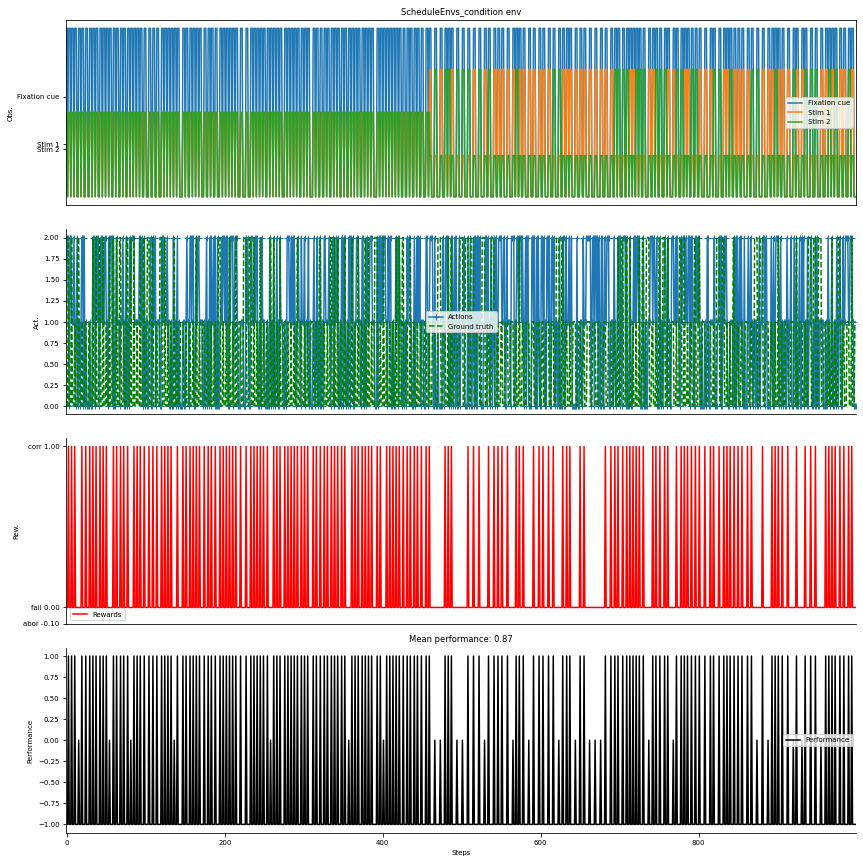

In [10]:
import numpy as np
import gym
import ngym_shaping as ng_sh
import warnings
warnings.filterwarnings('ignore')
# Task name
name = 'DR_stage-v0'
# task specification (here we only specify the duration of the different trial periods)
timing = {'fixation': ('constant', 100),
          'stimulus': ('constant', 300),
          'delay':(0, 100, 300),
          'decision': ('constant', 200)}
rewards = {'abort': -0.1, 'correct': +1., 'fail': 0.}
kwargs = {'dt': 100, 'timing': timing, 'rewards': rewards, 'stage': 0}  # TODO: test all stages
# build task
env = ng_sh.envs.DR_stage.shaping(stages=None, th=0.75, perf_w=20, stg_w=100) # TODO: compare stages=None (full shaping) with stages=[4] (no shaping)
# print task properties
print(env)
# wrapp task with pass-reward wrapper
# env = pass_reward.PassReward(env)
# plot example trials with random agent
data = ng_sh.utils.plot_env(env, fig_kwargs={'figsize': (12, 12)}, num_steps=1000, ob_traces=['Fixation cue', 'Stim 1', 'Stim 2'])  # , def_act=1) # , 'Previous reward'])

### Train a network

In [11]:
import numpy as np
import warnings
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
warnings.filterwarnings('default')
num_steps = 100 # TODO: find minumum number of steps for which nets learn the task with shaping

num_pers = int(num_steps/num_stps_per)
num_instances = 3  # TODO: find min number of steps with 3 and then test that number with 10 for both shaping and no-shaping
mean_perf = []
for ind in range(num_instances):
  # Shaping task
  # TODO: define parameters
  # TODO: pass env_kwargs
  env = ng_sh.envs.DR_stage.shaping(stages=None, th=0.75, perf_w=20, stg_w=100)
  env = DummyVecEnv([lambda: env])
  # Define model
  model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
  # Train model
  model.learn(total_timesteps=num_stps_per, log_interval=10000)
  data = ng_sh.utils.plotting.run_env(env, num_trials=1000, model=model)
  perf = np.array(data['perf'])
  mean_perf.append(np.mean(perf[perf != -1.]))


print(mean_perf)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.t

---------------------------------
| explained_variance | 0.00881  |
| fps                | 18       |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 0.58     |
---------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0
1
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
1
2


/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.t

---------------------------------
| explained_variance | -0.00983 |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 0.598    |
---------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0
1
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
1
2
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
2
3


/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.t

---------------------------------
| explained_variance | 0.0117   |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 0.757    |
---------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0
1
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
1
2
[0.632, 0.63, 0.541]


In [8]:
print(data['perf'][data['perf'] != -1])


-1


In [ ]:
# COPY
import numpy as np
import warnings
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
warnings.filterwarnings('default')
num_steps = 400000
num_stps_per = 1000
num_pers = int(num_steps/num_stps_per)
num_instances = 3
mean_perf = []
perf_list = []
for ind in range(num_instances):
  env = ng_sh.envs.DR_stage.shaping(stages=None, th=0.75, perf_w=20, stg_w=100) 
  # Optional: PPO2 requires a vectorized environment to run
  # the env is now wrapped automatically when passing it to the constructor
  env = DummyVecEnv([lambda: env])

  model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
  mean_perf = []  # CHANGE
  for ind_per in range(num_pers):  # CHANGE
    model.learn(total_timesteps=num_stps_per, log_interval=10000) # TODO: check minimum total_timesteps value with which the networks learn when fail=0
    ob_now, _, _, _ = env.step(0)  # TODO: not saving this first observation
    for ind in range(1000):  # CHANGE
      action, _ = model.predict(ob_now)
      ob_now, reward, _, info = env.step(action)
      if info['new_trial']:
        mean_perf.append(info['real_performance'])
    
    # TODO: COMPUTE MODEL PERFORMANCE 


perf_list.append(mean_perf)
print(perf_list)
print(np.mean(mean_perf))


/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.t

---------------------------------
| explained_variance | 0.012    |
| fps                | 2        |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 0.753    |
---------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0
1


TypeError: ignored

### Visualize results

In [ ]:
env = gym.make(name, **kwargs)
# print task properties
print(env)
# wrapp task with pass-reward wrapper
# env = pass_reward.PassReward(env)
env = DummyVecEnv([lambda: env])
# plot example trials with random agent
ngym.utils.plot_env(env, fig_kwargs={'figsize': (12, 12)}, num_steps=50, ob_traces=['Fixation cue', 'Stim 1', 'Stim 2'], model=model)  # , 'Previous reward'
data = ngym.utils.plotting.run_env(env, num_trials=1000, model=model)
    # data = {
    #     'ob': np.array(observations).astype(np.float), observations received by network
    #     'ob_cum': np.array(ob_cum).astype(np.float),
    #     'rewards': rewards,
    #     'actions': actions,
    #     'perf': perf,
    #     'actions_end_of_trial': actions_end_of_trial,
    #     'gt': gt,
    #     'states': states
    # }
# select indx where data['perf'] is diff. from -1 and average